<a href="https://colab.research.google.com/github/mariyajoseph2002/ml/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_dir='/content/drive/MyDrive/Colab Notebooks/Data/train'
test_dir='/content/drive/MyDrive/Colab Notebooks/Data/test'
validation_dir='/content/drive/MyDrive/Colab Notebooks/Data/validation'

**data preprocessing**
1.decode the jpeg content to rgb of pixels
2.convert these into floating point tensors
3.resclae the pixel values(btw 0 and 2550 to [0,1]

so this can be done using the beloww



In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
#generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
#generating 2 generators for traing and testing
#mentioning the target_size since the data in here are of different sizes
#classmose is binary sice its binary classification
#batchsize indicates that we process 20 images at a time
#by using imagedatagen we can augment the data for shearing..
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2019 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
#note that here in each conv we increase the filters
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#instead of sgd we r using rmsprop
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [16]:
#steps are step by no of data divided by batch size since train_generator has 2000 data div by 20 batcsize 100
history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1201s 12s/step - acc: 0.5182 - loss: 0.7297 - val_acc: 0.5640 - val_loss: 0.6848
Epoch 2/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1:31 923ms/step - acc: 0.4500 - loss: 0.6908

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - acc: 0.4500 - loss: 0.6908 - val_acc: 0.6040 - val_loss: 0.6823
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 850ms/step - acc: 0.6158 - loss: 0.6748 - val_acc: 0.6420 - val_loss: 0.6444
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - acc: 0.7000 - loss: 0.6021 - val_acc: 0.5800 - val_loss: 0.6557
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 836ms/step - acc: 0.6675 - loss: 0.6296 - val_acc: 0.6790 - val_loss: 0.6136
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - acc: 0.9000 - loss: 0.5126 - val_acc: 0.6690 - val_loss: 0.6144
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 838ms/step - acc: 0.6843 - loss: 0.5866 - val_acc: 0.6720 - val_loss: 0.6016
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - acc: 0.6500 - loss: 0.5878 - val_acc: 0.6510 - val_loss: 0.6340
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 838ms/step - acc: 0.7397 - loss: 0.5289 - val_acc: 0.6930 - val_loss: 0.5896
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 

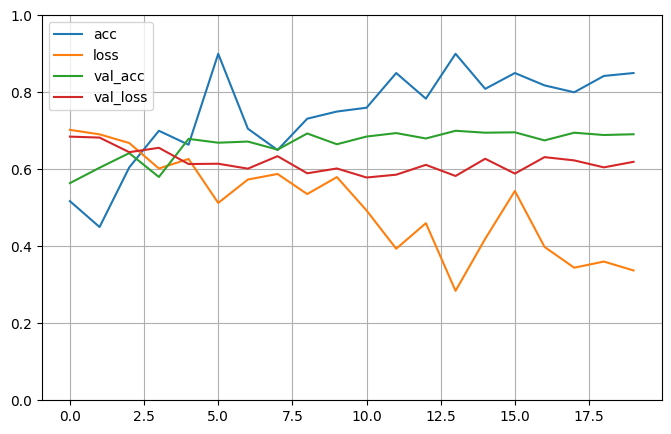

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

so if we look into the above graph we can see that its overfitting
so we apply shearing,.etc. ie. data augmentation and dropout layer


we can increase validation accuracy by generating more cmplx data

In [19]:
model.save("/content/drive/MyDrive/Colab Notebooks/Data/cnn_model.h5")

In [20]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
#here we define data augmentation maximum range..so it will take a value btw them
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2019 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
#note that here in each conv we increase the filters
#here we add a drpout layer too when cmprd with previous model to reduce overfitting
model1=models.Sequential()
model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(64,(3,3),activation='relu'))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(128,(3,3),activation='relu'))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(128,(3,3),activation='relu'))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model1.add(layers.Dense(512,activation='relu'))
model1.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model1.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [ ]:
history2=model1.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,#set epoch 100
    validation_data=validation_generator,
    validation_steps=50
)

whenever we specify generator we should also include steps